<a href="https://colab.research.google.com/github/NikhilGupta963/Walmart-Case-Study/blob/main/walmart_case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Walmart Case Study<br>-Nikhil Gupta**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men etc.

In [4]:
# @title *Importing necessary Libraries*

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
path = "/content/drive/My Drive/datasets"

In [7]:
walmart_data = pd.read_csv(path+"/walmart_data.csv")
walmart_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<ipython-input-83-d867fd071f7d>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


# *EXPLORATORY DATA ANALYSIS*

In [8]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [9]:
walmart_data = walmart_data.dropna()

In [10]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [11]:
walmart_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [12]:
walmart_data.shape

(550068, 10)

In [13]:
walmart_data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [14]:
walmart_data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [15]:
# converting data types of various columns to category

walmart_data[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']]=\
walmart_data[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']].astype('category')
walmart_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [16]:
walmart_data.describe(include=object)

,Product_ID
count,550068
unique,3631
top,P00265242
freq,1880


In [17]:
walmart_data.describe(include='category')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,2,7,21,3,5,2,20
top,M,26-35,4,B,1,0,5
freq,414259,219587,72308,231173,193821,324731,150933


In [18]:
# total user counts
user_df = walmart_data["User_ID"].value_counts().head(10)
user_df

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: count, dtype: int64

In [19]:
# getting the purchase sum per user

purchase_sum = walmart_data.groupby(["User_ID"])["Purchase"].sum().sort_values(ascending=False).head(10)
purchase_sum

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1004277'),
  Text(1, 0, '1001680'),
  Text(2, 0, '1002909'),
  Text(3, 0, '1001941'),
  Text(4, 0, '1000424'),
  Text(5, 0, '1004448'),
  Text(6, 0, '1005831'),
  Text(7, 0, '1001015'),
  Text(8, 0, '1003391'),
  Text(9, 0, '1001181')])

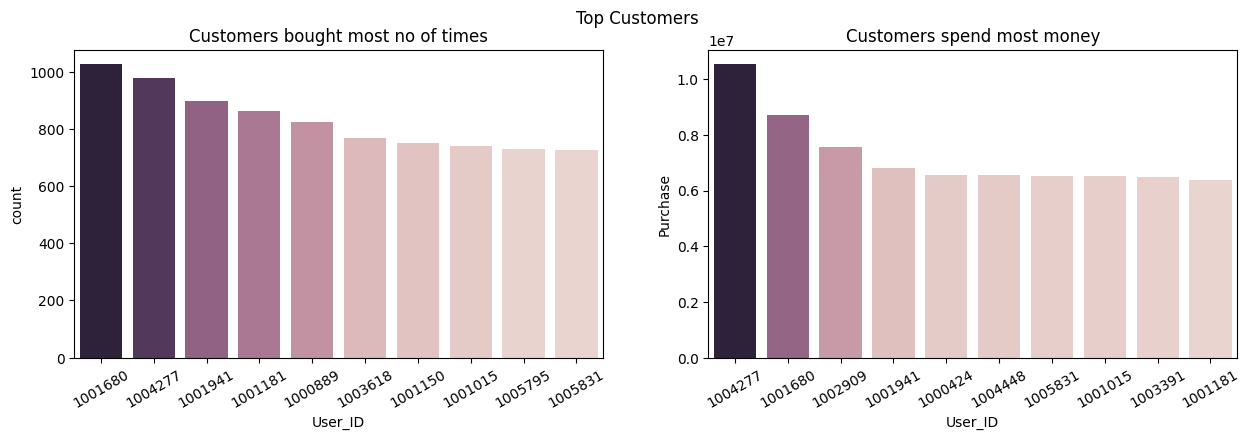

In [20]:
# visual representation
plt.figure(figsize=(15,4))
plt.suptitle("Top Customers")
plt.subplot(1,2,1)
sns.barplot(x=user_df.index,y=user_df,hue=user_df,legend=False,order=user_df.index)
plt.title("Customers bought most no of times")
plt.xticks(rotation=30)

plt.subplot(1,2,2)
sns.barplot(x=purchase_sum.index,y=purchase_sum,hue=purchase_sum,legend=False,order=purchase_sum.index)
plt.title("Customers spend most money")
plt.xticks(rotation=30)

- There are 5692 unique customers,some who made the purchases as many as 1026 times and some who made purchases for 6-7 times only.
- User_id 1004277 has made purchases maximum number of time followed by 1001680.
- User_id 1004277 bought products for maximum amount 10.5 billion followed by 1001680 and 1002909for 8.6 and 7.5 billion respectively.

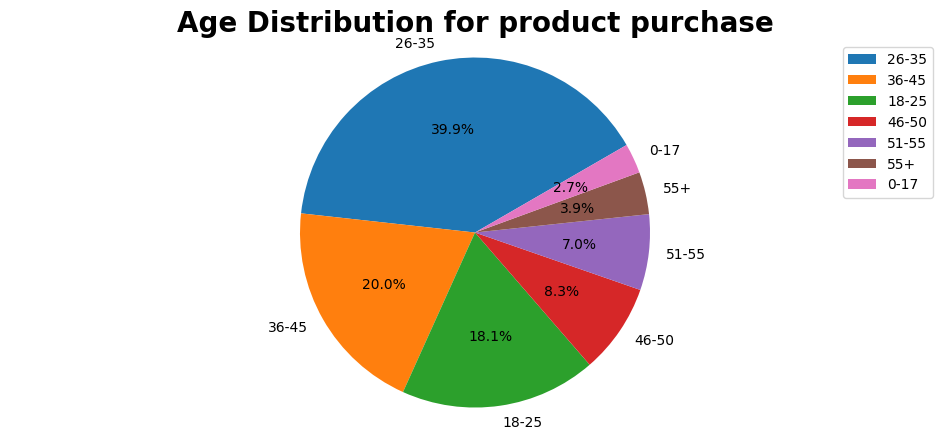

In [21]:
# a. What products are different age groups buying?

age = walmart_data["Age"].value_counts()

# plt.style.use('seaborn')
plt.figure(figsize = (12, 5))
plt.pie(age.values, labels = age.index, startangle = 30, autopct = '%1.1f%%')
plt.title('Age Distribution for product purchase', fontdict = {'fontsize' :20, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

Most number of orders are placed by the age grouo of 26-35 followed bt 36-45 and 18-25

In [22]:
# age vs product categories

product_category_df = walmart_data["Product_Category"].value_counts()
product_category_df

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [23]:
# Products different Age group buying
round(pd.crosstab(walmart_data['Age'],walmart_data['Product_Category'],normalize='index'),2)

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,0.24,0.05,0.08,0.05,0.29,0.03,0.00,0.15,0.0,0.01,0.05,0.01,0.01,0.0,0.01,0.02,0.0,0.00,0.0,0.01
18-25,0.27,0.04,0.05,0.02,0.29,0.04,0.00,0.18,0.0,0.01,0.05,0.00,0.01,0.0,0.01,0.02,0.0,0.00,0.0,0.00
26-35,0.27,0.04,0.03,0.02,0.28,0.04,0.01,0.20,0.0,0.01,0.04,0.00,0.01,0.0,0.01,0.02,0.0,0.00,0.0,0.00
36-45,0.25,0.04,0.04,0.02,0.27,0.04,0.01,0.21,0.0,0.01,0.05,0.01,0.01,0.0,0.01,0.02,0.0,0.01,0.0,0.00
46-50,0.23,0.05,0.03,0.02,0.26,0.04,0.01,0.23,0.0,0.01,0.05,0.01,0.01,0.0,0.01,0.02,0.0,0.01,0.0,0.00
51-55,0.24,0.05,0.02,0.02,0.26,0.04,0.01,0.24,0.0,0.01,0.04,0.01,0.01,0.0,0.01,0.02,0.0,0.01,0.0,0.01
55+,0.21,0.04,0.02,0.01,0.25,0.04,0.01,0.29,0.0,0.02,0.03,0.02,0.01,0.0,0.01,0.02,0.0,0.01,0.0,0.01


<Axes: xlabel='purchase_clip'>

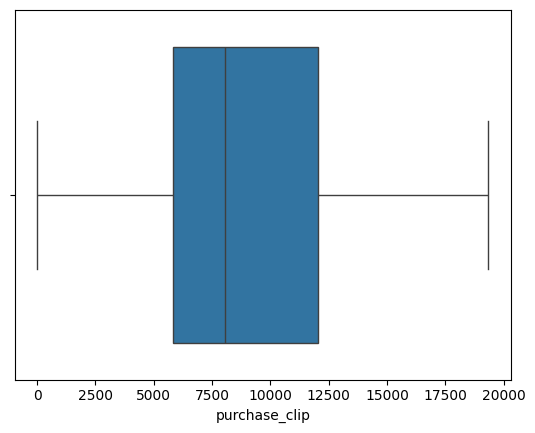

In [24]:
# @title *Clipping the data. i.e : removing the outliers*


walmart_data['purchase_clip']=np.clip(walmart_data['Purchase'],None,np.percentile(walmart_data['Purchase'],95))

quartile1 = np.percentile(walmart_data['purchase_clip'],25)
quartile3 = np.percentile(walmart_data['purchase_clip'],75)
median = np.percentile(walmart_data['purchase_clip'],50)
range1 = quartile3-quartile1
low_whisk = max(quartile1-(range1*1.5),min(walmart_data['purchase_clip']))
upper_whisk = min(quartile3+(range1*1.5),max(walmart_data['purchase_clip']))



sns.boxplot(walmart_data['purchase_clip'],orient='h')


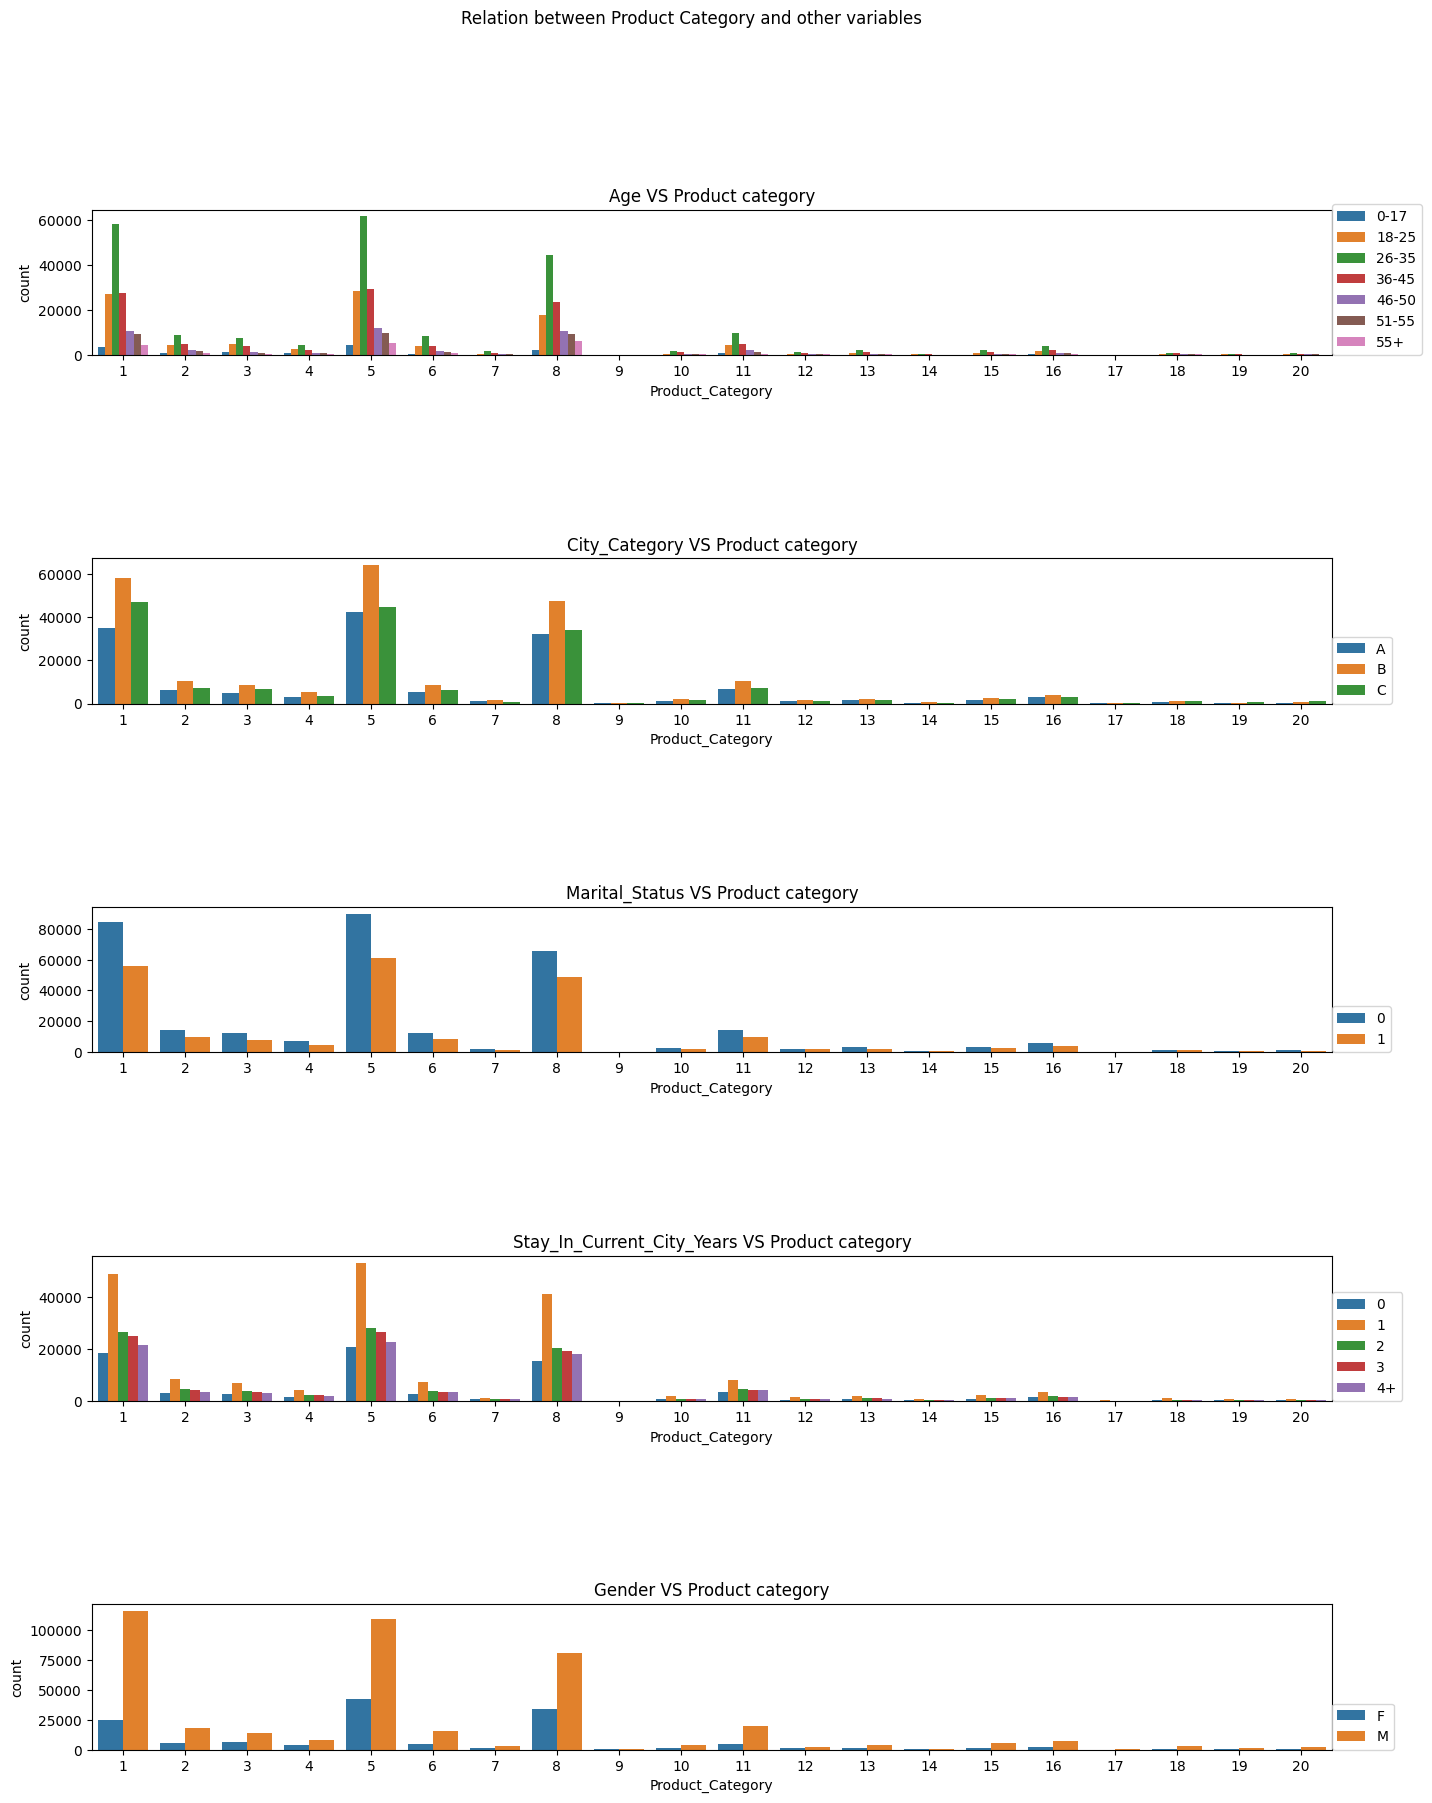

In [25]:
# relation between product category and other features through graphs
column=[ 'Age', 'City_Category','Marital_Status',
       'Stay_In_Current_City_Years','Gender']

plt.figure(figsize=(16,20))
plot=1
plt.suptitle("Relation between Product Category and other variables")
for col in column:
  plt.subplot(9,1,plot)
  plt.title(f"{col} VS Product category")
  sns.countplot(data=walmart_data,hue=col,x='Product_Category')
  plt.legend(loc=(1,0))
  plot+=2
plt.show()

*AGE RANGE AND PRODUCT CATEGORY*
- Product category 5, 1 and 8 are bought mostly by age groups more by 26-35,26-25,18-25 and by other categories too.
- Product Category 2,3,4,6 and 11 are also bought by various age people but the remaining product categories are sold less.
- Product Category 7,10,12,13,15,16 are sold too less.
- Product Category 9,14,17,18,19,20 are not bought by any age people much, approximately negligible.
- Age range dont have much impact for most of the categories products.

*CITY AND PRODUCT CATEGORY*
- As we have already seen City B customers are most frequesnt buyers they buy more for each product category followed by City C and City A. so Product Category sales are independent of City.

*MARITAL STATUS AND PRODUCT CATEGORY*
- In Marital Status too almost all category products are bought more by Unmarried people rather than married people.
- So marital status too dont have much impact on product category.

*STAY IN CURRENT CITY AND PRODUCT CATEGORY*
- Stay in current city dont have much impact on product category sales as 1 year stay customer bought almost every category products most bnumber of times followed by 2,3,4+ and 0.

*GENDER AND PRODUCT CATEGORY*
- Almost each product category is bought by males more than females.
- The difference is extreme for Product Category 1, followed by 5 and 8.

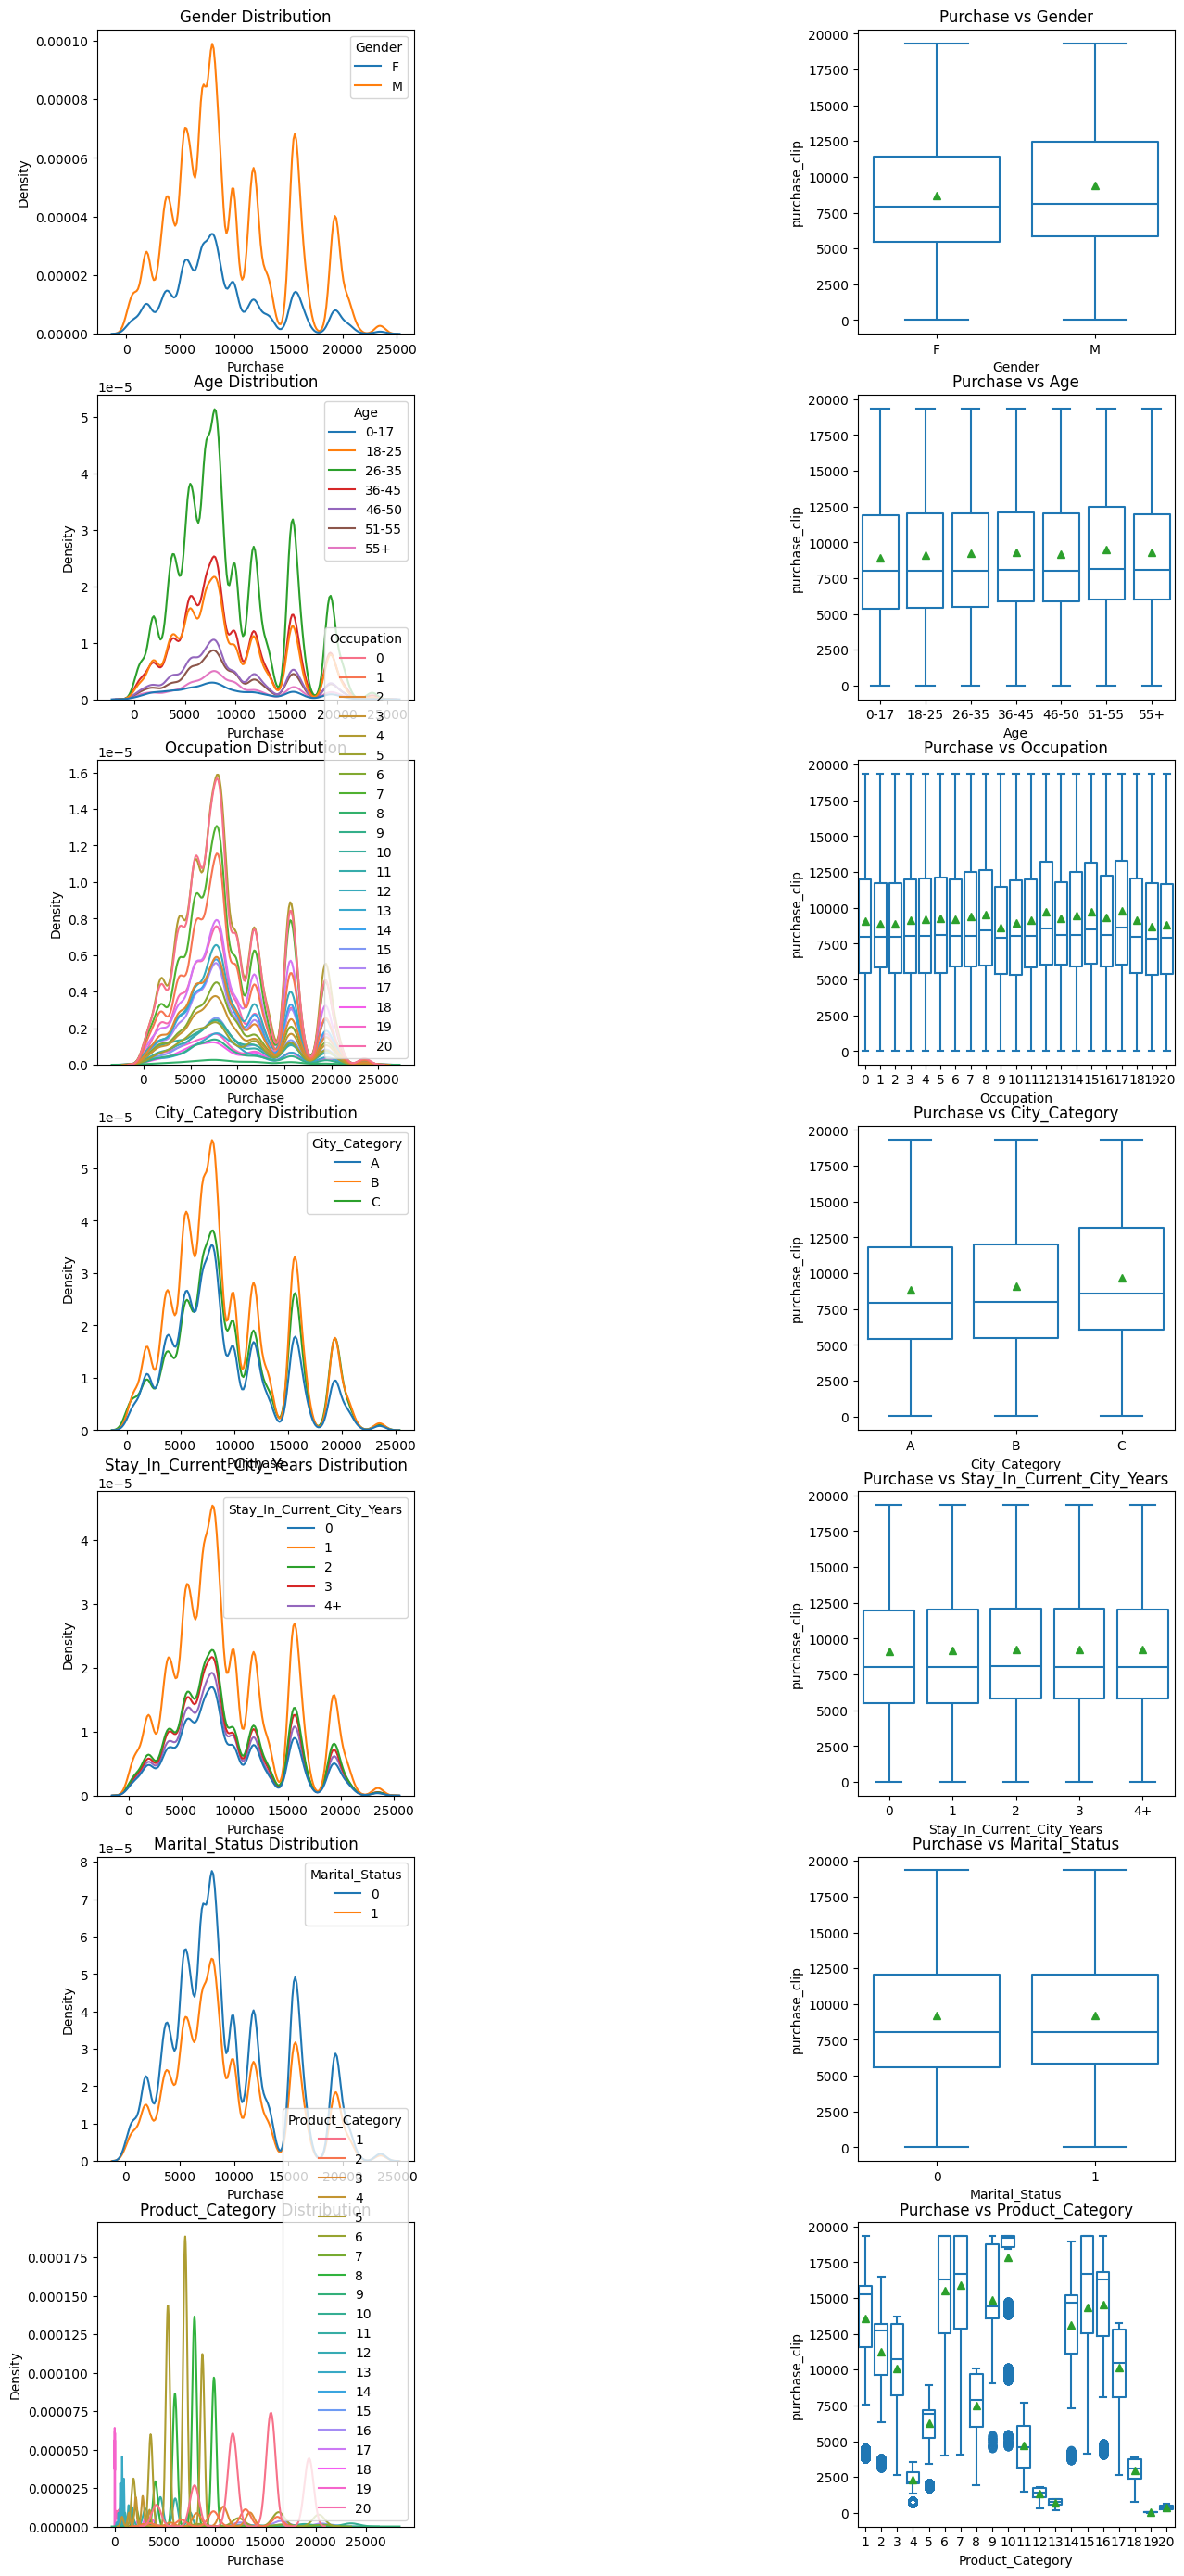

In [26]:
# @title *PURCHASE RELATION WITH OTHER COLUMNS*
column=[ 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status','Product_Category']
plt.figure(figsize=(15,35))
plot=1
for col in column:
  plt.subplot(7,3,plot)
  sns.kdeplot(walmart_data,x='Purchase',hue=col)
  plt.title(f"{col} Distribution")


  plot+=2
  plt.subplot(7,3,plot)
  sns.boxplot(data=walmart_data,x=col,y='purchase_clip',fill=False,showmeans=True)
  plt.title(f"Purchase vs {col}")
  plot+=1
plt.show()

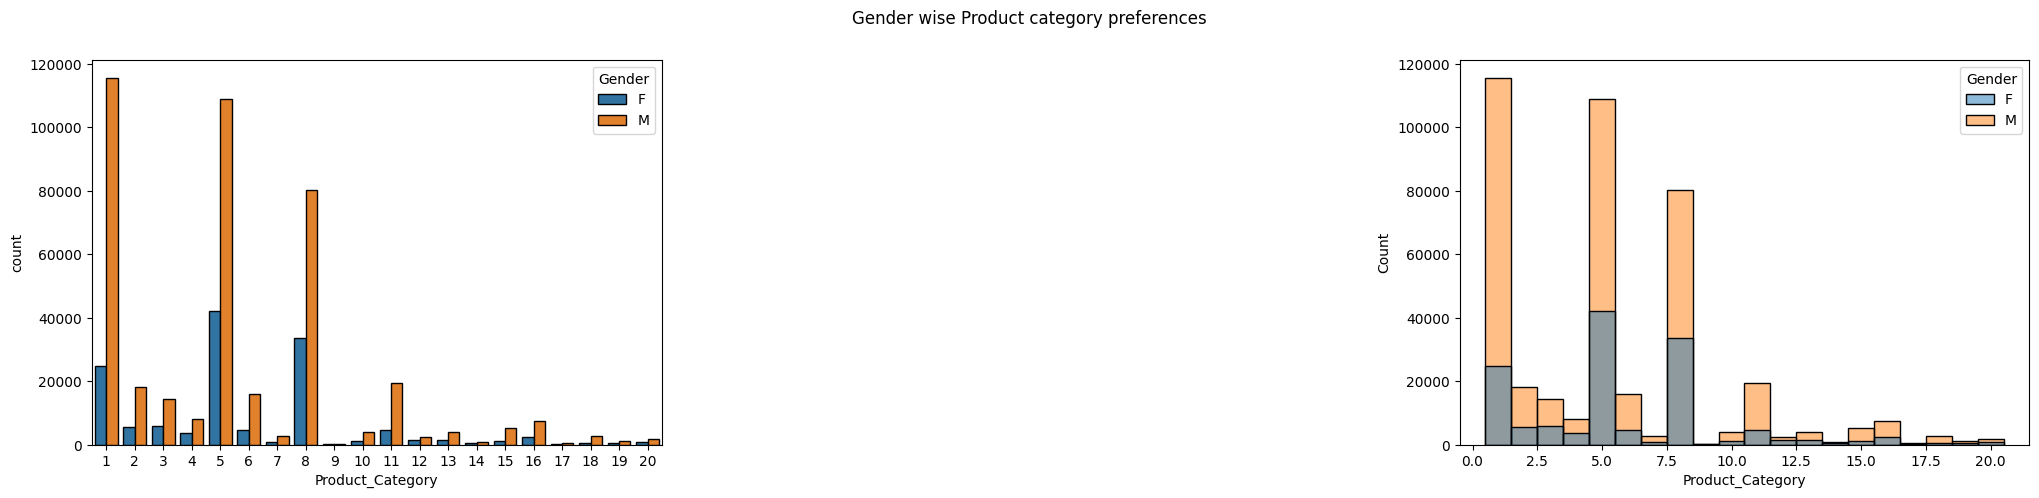

In [27]:
plt.figure(figsize=(25,5))
plt.suptitle("Gender wise Product category preferences")
plt.subplot(131)
sns.countplot(hue=walmart_data['Gender'],x=walmart_data['Product_Category'],edgecolor='black')

plt.subplot(133)
sns.histplot(data=walmart_data,x='Product_Category',hue='Gender')
plt.show()

# **CENTRAL LIMIT THEOREM**

*Does Gender affect on amount spent?*

In [28]:
walmart_data.groupby(["Gender"])["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Density'>

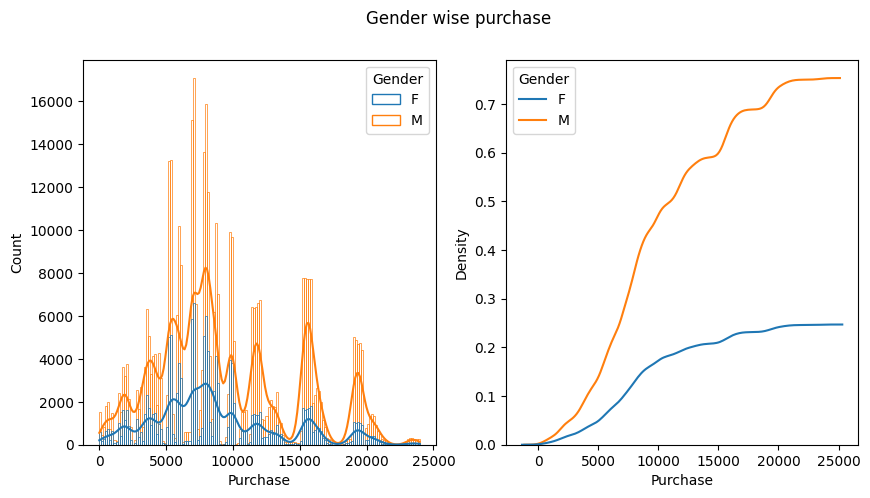

In [29]:
plt.figure(figsize=(10,5))
plt.suptitle("Gender wise purchase")
plt.subplot(1,2,1)
sns.histplot(x=walmart_data["Purchase"], hue=walmart_data["Gender"], kde=True, fill=False)

plt.subplot(1,2,2)
sns.kdeplot(x=walmart_data["Purchase"], hue=walmart_data["Gender"], cumulative=True)

Since the distribution is not Gaussian, cant infer much out of it, lets use CLT to make it Normal Distribution by taking different sample sizes

In [31]:
# creating 2 different Purchase datas for male and female

male_df = walmart_data[walmart_data["Gender"] == "M"]["Purchase"]
female_df = walmart_data[walmart_data["Gender"] == "F"]["Purchase"]

In [32]:
# Defining Custom function for finding Class Interval
def conf_int(data,k):
  low_ci=round(np.percentile(data,(100-k)/2),2)
  upper_ci=round(np.percentile(data,k+(100-k)/2),2)
  return low_ci,upper_ci

In [33]:
# @title *Entire dataset mean range with 95% confidence interval*
print(f"For males, Purchase  mean with 95% Confidence Interval lies in the range of {conf_int(male_df,95)}")
print(f"For females, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(female_df,95)}")

For males, Purchase  mean with 95% Confidence Interval lies in the range of (1436.0, 19925.0)
For females, Purchase mean with 95% Confidence Interval lies in the range of (1376.0, 19648.0)


Due to overlapping we can not conclude if men buy more than women. This can be by chance also.<br>
Now we will do bootstrapping.



In [34]:
# @title *300 samples mean range with 95% confidence interval*

male_df_300 = [np.random.choice(male_df, size=300).mean() for i in range(50000)]
female_df_300 = [np.random.choice(female_df, size=300).mean() for i in range(50000)]

print(f"For 300 male samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(male_df_300,95)}")
print(f"For 300 female samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(female_df_300,95)}")

For 300 male samples, Purchase mean with 95% Confidence Interval lies in the range of (8859.46, 10019.83)
For 300 female samples, Purchase mean with 95% Confidence Interval lies in the range of (8198.59, 9277.39)


Text(0.5, 1.0, '300 sample mean distribution with 95% Confidence Interval')

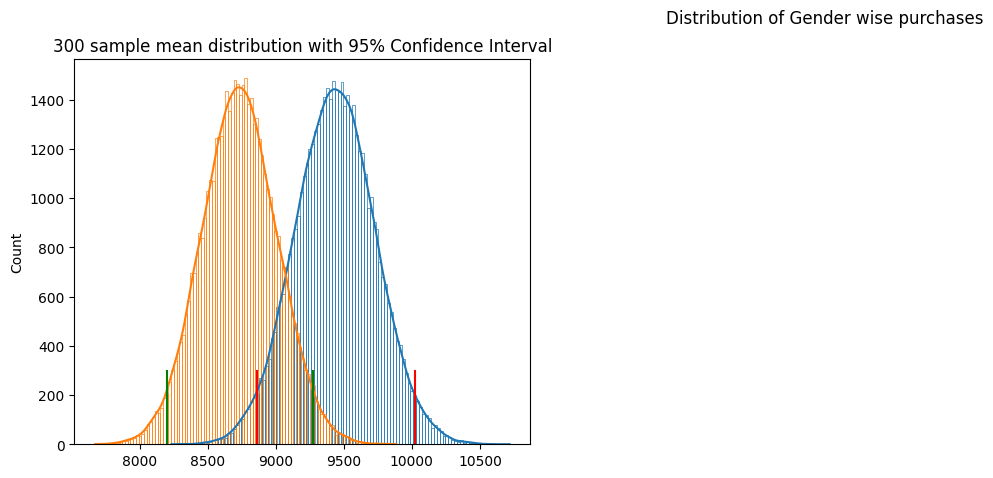

In [35]:
plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Gender wise purchases")
plt.subplot(131)
sns.histplot(male_df_300,kde=True,fill=False)
sns.histplot(female_df_300,kde=True,fill=False)
plt.vlines(np.percentile(male_df_300,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(male_df_300,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(female_df_300,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(female_df_300,97.5),colors='green',ymin=0,ymax=300)
plt.title("300 sample mean distribution with 95% Confidence Interval")

Since there is overlapping in the dataset we will increase the sample size to 3000 to check if there is any chance in our analysis

In [36]:
# @title *3000 samples mean range with 95% confidence interval*

male_df_3000 = [np.random.choice(male_df, size=3000).mean() for i in range(50000)]
female_df_3000 = [np.random.choice(female_df, size=3000).mean() for i in range(50000)]

print(f"For 3000 male samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(male_df_3000,95)}")
print(f"For 3000 female samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(female_df_3000,95)}")

For 3000 male samples, Purchase mean with 95% Confidence Interval lies in the range of (9253.79, 9619.21)
For 3000 female samples, Purchase mean with 95% Confidence Interval lies in the range of (8564.05, 8906.07)


Text(0.5, 1.0, '3000 sample mean distribution with 95% Confidence Interval')

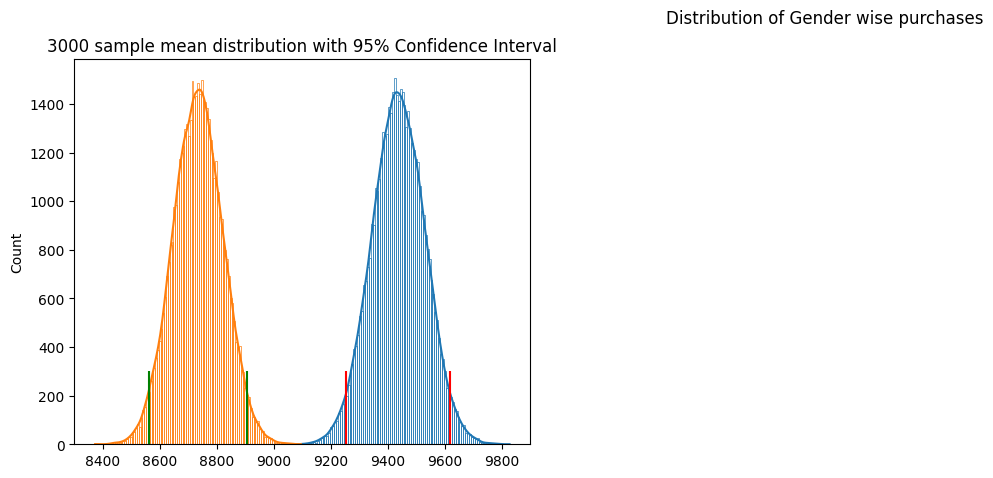

In [37]:
plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Gender wise purchases")
plt.subplot(131)
sns.histplot(male_df_3000,kde=True,fill=False)
sns.histplot(female_df_3000,kde=True,fill=False)
plt.vlines(np.percentile(male_df_3000,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(male_df_3000,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(female_df_3000,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(female_df_3000,97.5),colors='green',ymin=0,ymax=300)
plt.title("3000 sample mean distribution with 95% Confidence Interval")

The overlap in the males and female purchase mean value ended but Let's check can we conclude the difference with the increased confidence interval.

In [38]:
# @title *3000 samples mean range with 99% confidence interval*

male_df_3000_at_99 = [np.random.choice(male_df, size=3000).mean() for i in range(50000)]
female_df_3000_at_99 = [np.random.choice(female_df, size=3000).mean() for i in range(50000)]

print(f"For 3000 male samples, Purchase mean with 99% Confidence Interval lies in the range of {conf_int(male_df_3000_at_99,99)}")
print(f"For 3000 female samples, Purchase mean with 99% Confidence Interval lies in the range of {conf_int(female_df_3000_at_99,99)}")

For 3000 male samples, Purchase mean with 99% Confidence Interval lies in the range of (9200.74, 9679.66)
For 3000 female samples, Purchase mean with 99% Confidence Interval lies in the range of (8511.97, 8960.24)


Text(0.5, 1.0, '3000 sample mean distribution with 99% Confidence Interval')

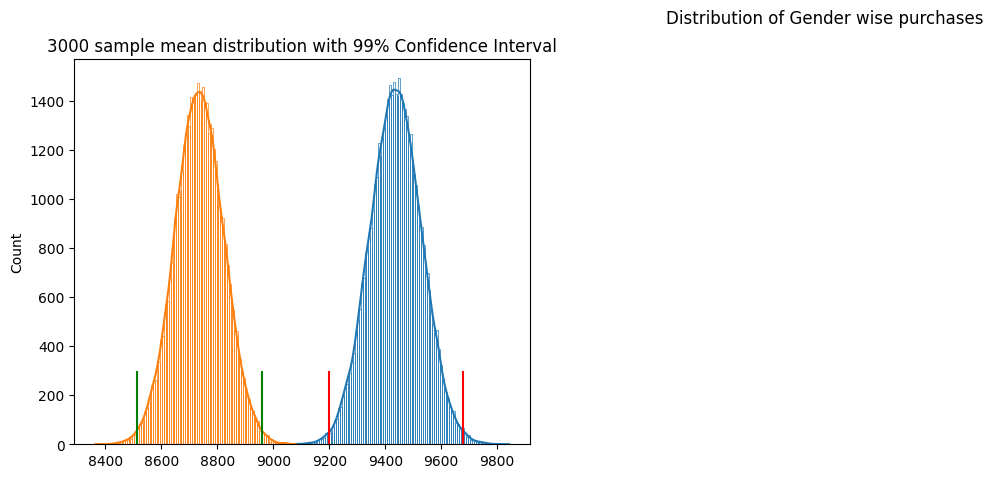

In [39]:
plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Gender wise purchases")
plt.subplot(131)
sns.histplot(male_df_3000_at_99,kde=True,fill=False)
sns.histplot(female_df_3000_at_99,kde=True,fill=False)
plt.vlines(np.percentile(male_df_3000_at_99,0.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(male_df_3000_at_99,99.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(female_df_3000_at_99,0.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(female_df_3000_at_99,99.5),colors='green',ymin=0,ymax=300)
plt.title("3000 sample mean distribution with 99% Confidence Interval")

Therefore, we can conclude from the above analysis that:
- As we got the analysis that there are difference in spending behaviour of males and females we dont need to go to increase the sample size to 9000.
-When using the entire dataset,we were not able to conclude the difference in
spending behaviour because of the outliers which pulls the mean value of both male and female to be in the same levels causing overlap.
- Hence performed CI with sample size of 300 for 50000 iterations at 95% confidence interval,the results were same, there was overlap of levels in both male and female thus not able to conclude
- Increased sample size to 3000 for 50000 iterations at 95% CI and 99% confidence interval, there was no overlap. at 95% confidence Interval (3000 sample size) we were able to conclude that mean spending of male is more than the female.
- Male spend on an average of (9200.74, 9679.66) while females (8511.97, 8960.24).
- And with increase in confidence interval to 99% , the results were same but now more confident with the results.
- 95 % Confidence Interval range of entire dataset is wider for male than females,it indicates that there is variability in the estimates for both male and female purchases.
- The wider range implied the data points are more dispersed for the males than females.
- With the increase in the sample size the width of the confidence interval starts reducing as increase in sample size decreasing chances of standard error and we can have more confident with our findings.
- The confidence interval overlap for the entire dataset and for 300 sample size but with 3000 sample size it is not overlapping.
- We have seen that the 300 sample size distribution is not much normally distributed which become a little more normally distributed with increase in sample size.

In [40]:
# @title *Marital Status affect on amount spent*
# mean purchase
walmart_data.groupby(['Marital_Status'])['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [43]:
walmart_data['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

<Axes: xlabel='Purchase', ylabel='Density'>

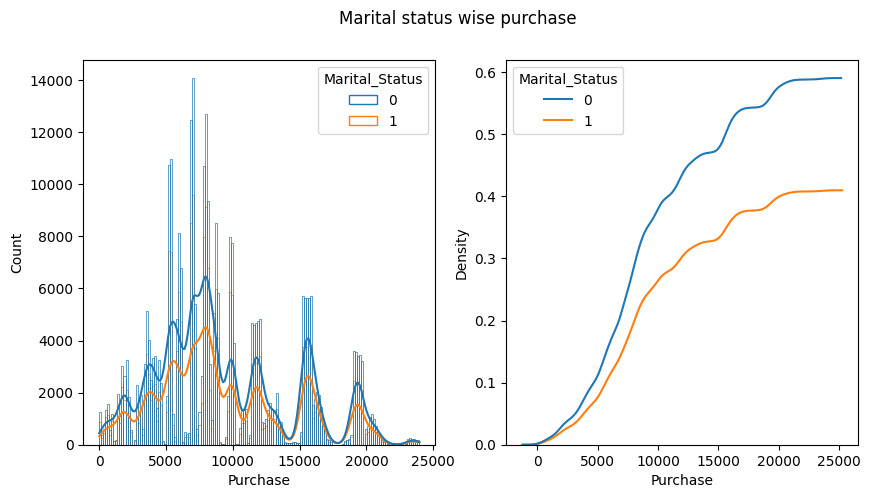

In [44]:
# Checking Purchase distribution Marital Status wise


plt.figure(figsize=(10,5))
plt.suptitle("Marital status wise purchase")
plt.subplot(1,2,1)
sns.histplot(x=walmart_data["Purchase"], hue=walmart_data["Marital_Status"], kde=True, fill=False)

plt.subplot(1,2,2)
sns.kdeplot(x=walmart_data["Purchase"], hue=walmart_data["Marital_Status"], cumulative=True)

In [45]:
# creating different Purchase data for married and unmarried

married_df=walmart_data[walmart_data['Marital_Status']== 1]['Purchase']
unmarried_df=walmart_data[walmart_data['Marital_Status']== 0.0]['Purchase']


In [46]:
# @title *Entire dataset mean range with 95% confidence interval*

print(f"For married, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_df,95)}")
print(f"For unmarried, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_df,95)}")

For married, Purchase mean with 95% Confidence Interval lies in the range of (1399.0, 19707.0)
For unmarried, Purchase mean with 95% Confidence Interval lies in the range of (1429.0, 19701.0)


Due to overlapping we can not conclude if men buy more than women. This can be by chance also.
Now we will do bootstrapping.

In [47]:
# @title *300 samples mean range with 95% confidence interval*


married_sample_300=[np.random.choice(married_df,size=300).mean() for i in range(25000)]
unmarried_sample_300=[np.random.choice(unmarried_df,size=300).mean() for i in range(25000)]

print(f"For 300 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_sample_300,95)}")
print(f"For 300 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_sample_300,95)}")

For 300 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8701.25, 9840.85)
For 300 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of (8695.34, 9832.11)


Text(0.5, 1.0, 'Mean distribution with 95% Confidence Interval')

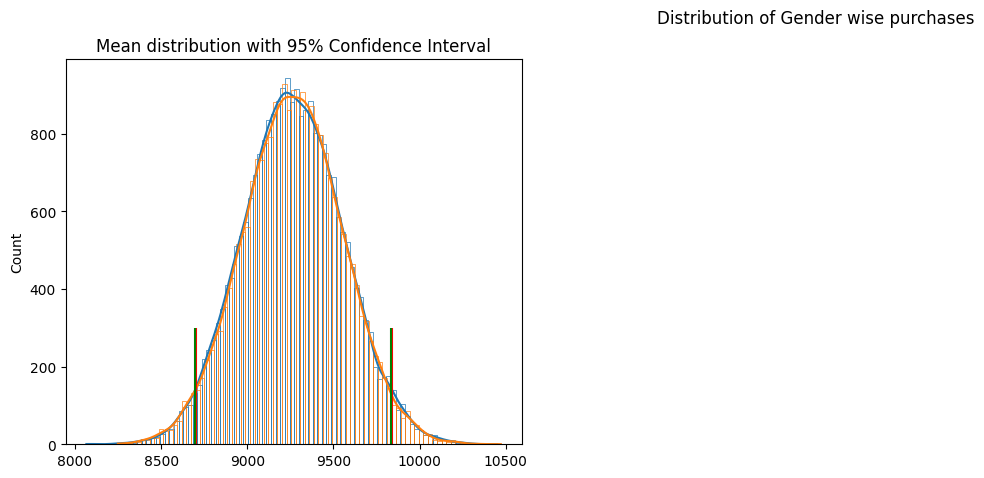

In [48]:
plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Gender wise purchases")
plt.subplot(131)
sns.histplot(married_sample_300,kde=True,fill=False)
sns.histplot(unmarried_sample_300,kde=True,fill=False)
plt.vlines(np.percentile(married_sample_300,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(married_sample_300,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_300,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_300,97.5),colors='green',ymin=0,ymax=300)
plt.title("Mean distribution with 95% Confidence Interval")

Since there is overlapping of values,unable to conclude the difference in spending behaviour of married and unmarried. Hence will increase the sample size to 3000.

In [49]:
# @title *3000 samples mean range with 95% confidence interval*


married_sample_3000=[np.random.choice(married_df,size=3000).mean() for i in range(25000)]
unmarried_sample_3000=[np.random.choice(unmarried_df,size=3000).mean() for i in range(25000)]

print(f"For 3000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_sample_3000,95)}")
print(f"For 3000 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_sample_3000,95)}")

For 3000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9082.04, 9443.39)
For 3000 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of (9088.56, 9446.54)


Text(0.5, 1.0, 'Mean distribution with 95% Confidence Interval')

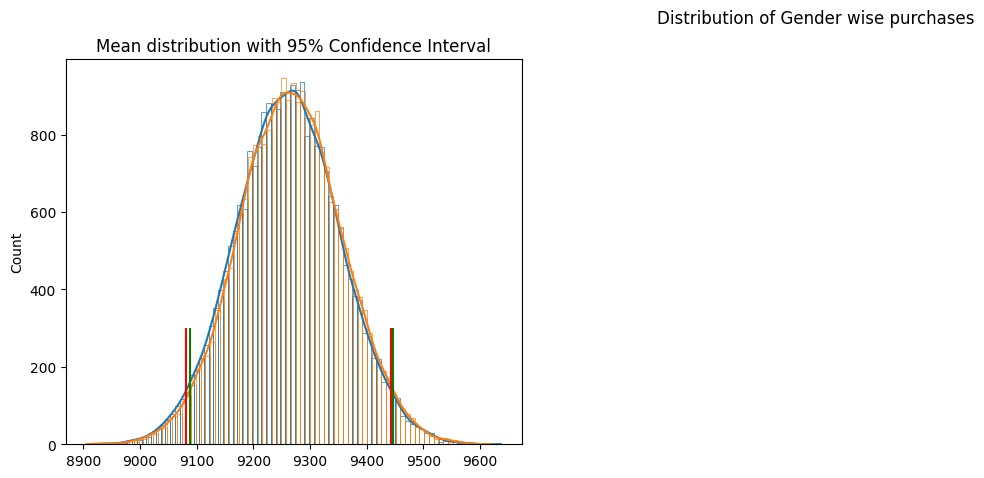

In [50]:
plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Gender wise purchases")
plt.subplot(131)
sns.histplot(married_sample_3000,kde=True,fill=False)
sns.histplot(unmarried_sample_3000,kde=True,fill=False)
plt.vlines(np.percentile(married_sample_3000,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(married_sample_3000,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_3000,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_3000,97.5),colors='green',ymin=0,ymax=300)
plt.title("Mean distribution with 95% Confidence Interval")

Since there is again overlapping of values,unable to conclude the difference in spending behaviour of married and unmarried. Hence will increase the sample size to 6000.

In [51]:
# @title *6000 samples mean range with 95% confidence interval*


married_sample_6000=[np.random.choice(married_df,size=6000).mean() for i in range(25000)]
unmarried_sample_6000=[np.random.choice(unmarried_df,size=6000).mean() for i in range(25000)]

print(f"For 6000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_sample_6000,95)}")
print(f"For 6000 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_sample_6000,95)}")

For 6000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9134.65, 9386.06)
For 6000 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of (9140.47, 9392.57)


Text(0.5, 1.0, 'Mean distribution with 95% Confidence Interval')

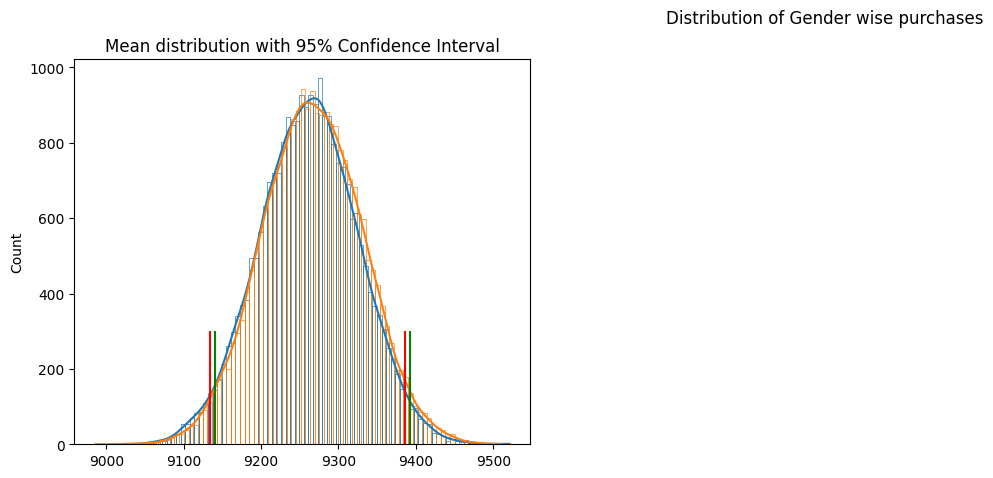

In [52]:
plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Gender wise purchases")
plt.subplot(131)
sns.histplot(married_sample_6000,kde=True,fill=False)
sns.histplot(unmarried_sample_6000,kde=True,fill=False)
plt.vlines(np.percentile(married_sample_6000,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(married_sample_6000,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_6000,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_6000,97.5),colors='green',ymin=0,ymax=300)
plt.title("Mean distribution with 95% Confidence Interval")

Since there is again overlapping of values,unable to conclude the difference in spending behaviour of married and unmarried. Hence will increase the sample size to 12000.

In [53]:
# @title *12000 samples mean range with 95% confidence interval*


married_sample_12000=[np.random.choice(married_df,size=12000).mean() for i in range(25000)]
unmarried_sample_12000=[np.random.choice(unmarried_df,size=12000).mean() for i in range(25000)]

print(f"For 12000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_sample_12000,95)}")
print(f"For 12000 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_sample_12000,95)}")

For 12000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9171.12, 9350.64)
For 12000 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of (9175.28, 9355.69)


Text(0.5, 1.0, 'Mean distribution with 95% Confidence Interval')

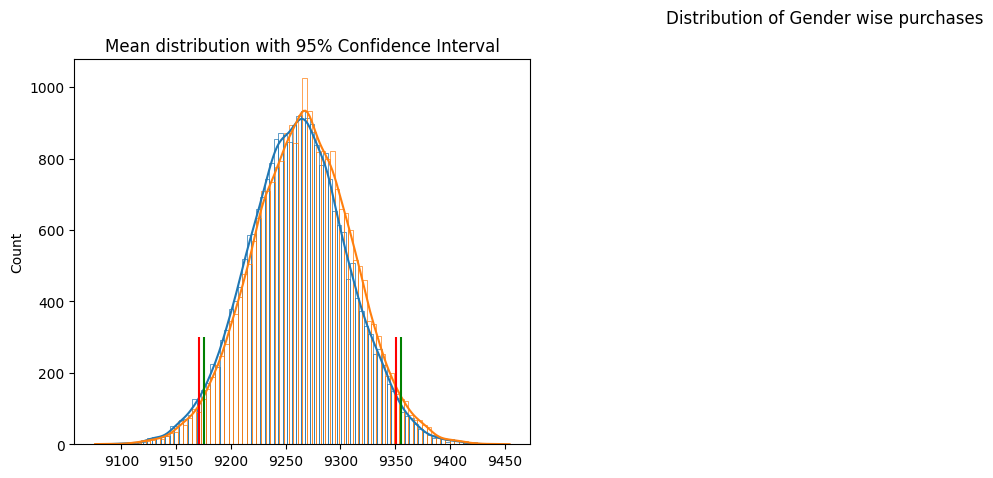

In [54]:
plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Gender wise purchases")
plt.subplot(131)
sns.histplot(married_sample_12000,kde=True,fill=False)
sns.histplot(unmarried_sample_12000,kde=True,fill=False)
plt.vlines(np.percentile(married_sample_12000,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(married_sample_12000,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_12000,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_12000,97.5),colors='green',ymin=0,ymax=300)
plt.title("Mean distribution with 95% Confidence Interval")

Since there is again overlapping of values,unable to conclude the difference in spending behaviour of married and unmarried. lastly, will increase the sample size to 24000.

In [55]:
# @title *24000 samples mean range with 95% confidence interval*


married_sample_24000=[np.random.choice(married_df,size=24000).mean() for i in range(25000)]
unmarried_sample_24000=[np.random.choice(unmarried_df,size=24000).mean() for i in range(25000)]

print(f"For 24000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_sample_24000,95)}")
print(f"For 24000 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_sample_24000,95)}")

For 24000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9198.28, 9323.75)
For 24000 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of (9203.54, 9328.9)


Text(0.5, 1.0, 'Mean distribution with 95% Confidence Interval')

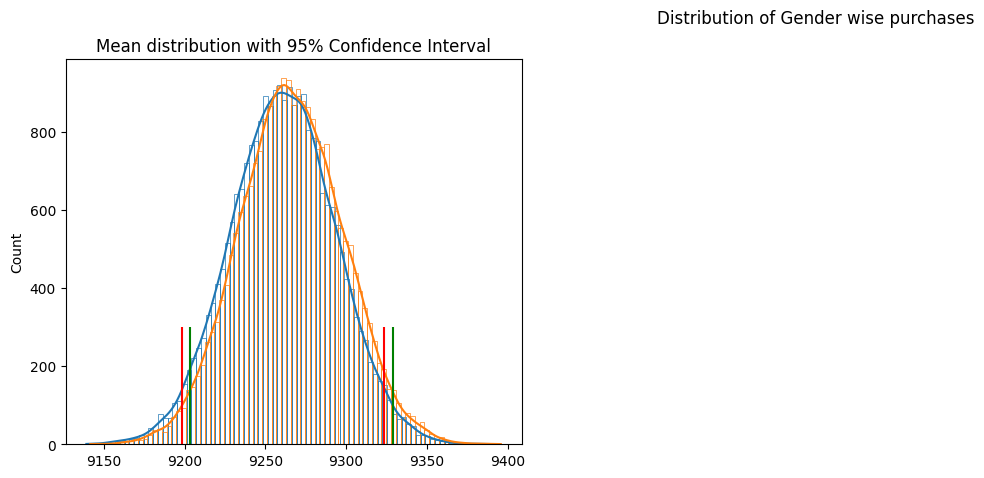

In [56]:
plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Gender wise purchases")
plt.subplot(131)
sns.histplot(married_sample_24000,kde=True,fill=False)
sns.histplot(unmarried_sample_24000,kde=True,fill=False)
plt.vlines(np.percentile(married_sample_24000,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(married_sample_24000,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_24000,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_24000,97.5),colors='green',ymin=0,ymax=300)
plt.title("Mean distribution with 95% Confidence Interval")

- With entire dataset we are not able to find the difference between both groups spending behaviour due to total overlap.
- Performed CI with sample size of 300 for 5000 iterations at 95% Confidence interval,the result is  there was overlap in married and unmarried purchase amount, hence unable to conclude
- Increased sample size to 3000 for 25000 iterations at 95% Confidence interval,there was overlap for both married and unmarried purchase amount,hence unable to conclude
- Increased sample size to 24000 for 25000 iterations at 95% Confidence interval, there was still overlap for both so the average spending behaviour of married and unmarried are same.
- The difference in the width of confidence interval of entire dataset is approx 40. which decreased to 2 with increase in sample sizes which implies that the data points are dispersed in almost same manner.
- Overlapping in both groups even with increase in sample sizes implies that both groups have same mean purchases irrespective of number of times they bought products.
- The width of confidence interval for entire dataset was as wide as 18000 which reduced to 100 with 30000 samples which shows the decrease in variablity of datapoints with increase in sample size.
- The shape of distribution of dataset was not normally distributed but it become so with  increase in sample sizes.

In [57]:
# @title *Age affect on amount spent*

# Mean Purchase
walmart_data.groupby(['Age'])['Purchase'].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

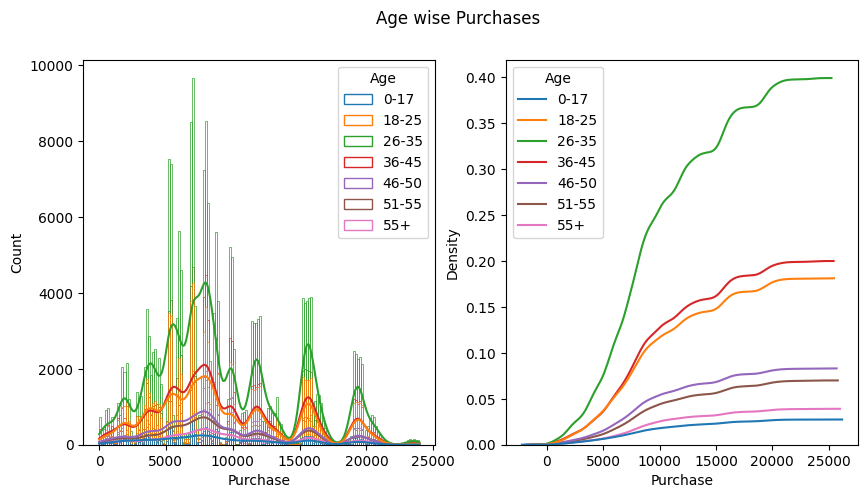

In [58]:
# @title *Check for the spread of data*


plt.figure(figsize=(10,5))
plt.suptitle('Age wise Purchases')
plt.subplot(121)
sns.histplot(x=walmart_data['Purchase'],hue=walmart_data['Age'],kde=True,fill=False)

plt.subplot(122)
sns.kdeplot(x=walmart_data['Purchase'],hue=walmart_data['Age'],cumulative=True)
plt.show()

Since the data is not gaussian therefore we need to make samples of the data an check on those samples.

In [59]:
# creating different Purchase datas for different age groups

child_samp=walmart_data[walmart_data['Age']=='0-17']['Purchase']
youth_samp=walmart_data[walmart_data['Age']=='18-25']['Purchase']
youngadult_samp=walmart_data[walmart_data['Age']=='26-35']['Purchase']
middleadult_samp=walmart_data[walmart_data['Age']=='36-45']['Purchase']
matureadult_samp=walmart_data[walmart_data['Age']=='46-50']['Purchase']
oldadult_samp=walmart_data[walmart_data['Age']=='51-55']['Purchase']
old_samp=walmart_data[walmart_data['Age']=='55+']['Purchase']

In [60]:
# @title *Entire dataset mean range with 95% confidence interval*
print(f"For 0-17 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(child_samp,95)}")
print(f"For 18-25 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youth_samp,95)}")
print(f"For 26-35 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youngadult_samp,95)}")
print(f"For 36-45 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(middleadult_samp,95)}")
print(f"For 46-50 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(matureadult_samp,95)}")
print(f"For 50-55 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(oldadult_samp,95)}")
print(f"For 55+ Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(old_samp,95)}")

For 0-17 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1051.58, 19669.47)
For 18-25 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1464.48, 19673.0)
For 26-35 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1513.65, 19698.0)
For 36-45 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1392.0, 19703.0)
For 46-50 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1076.0, 19698.0)
For 50-55 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1080.5, 20228.5)
For 55+ Age group, Purchase mean with 95% Confidence Interval lies in the range of (932.0, 20176.12)


In [61]:
# @title *300 samples mean range with 95% confidence interval*


child_samp_300=[child_samp.sample(300).mean() for i in range(2000)]
youth_samp_300=[youth_samp.sample(300).mean() for i in range(2000)]
youngadult_samp_300=[youngadult_samp.sample(300).mean() for i in range(2000)]
middleadult_samp_300=[middleadult_samp.sample(300).mean() for i in range(2000)]
matureadult_samp_300=[matureadult_samp.sample(300).mean() for i in range(2000)]
oldadult_samp_300=[oldadult_samp.sample(300).mean() for i in range(2000)]
old_samp_300=[old_samp.sample(300).mean() for i in range(2000)]

print(f"For 300 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(child_samp_300,95)}")
print(f"For 300 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youth_samp_300,95)}")
print(f"For 300 26-35 Age customer samples,Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youngadult_samp_300,95)}")
print(f"For 300 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(middleadult_samp_300,95)}")
print(f"For 300 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(matureadult_samp_300,95)}")
print(f"For 300 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(oldadult_samp_300,95)}")
print(f"For 300 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(old_samp_300,95)}")

For 300 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8337.91, 9538.87)
For 300 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8574.89, 9698.01)
For 300 26-35 Age customer samples,Purchase mean with 95% Confidence Interval lies in the range of (8691.63, 9809.83)
For 300 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8779.47, 9881.89)
For 300 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8648.56, 9788.75)
For 300 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8968.6, 10114.93)
For 300 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8753.24, 9910.97)


Text(0.5, 1.0, '300 sample mean distribution')

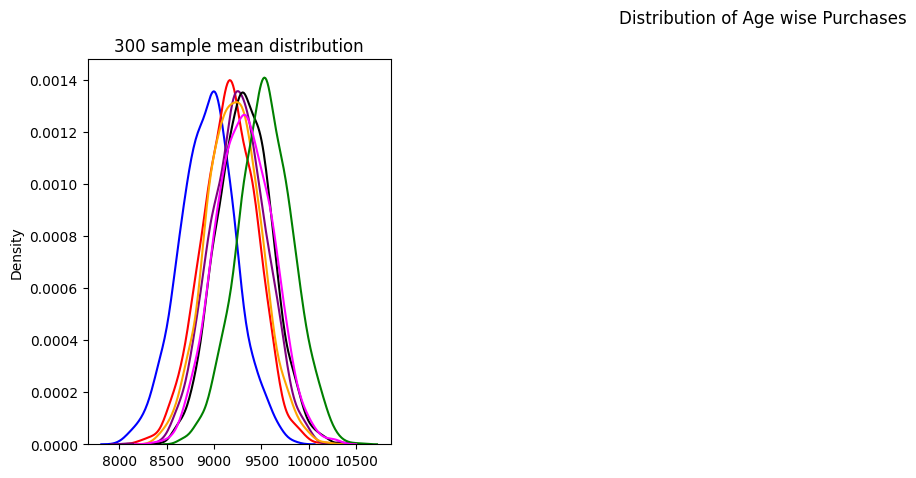

In [62]:
plt.figure(figsize=(18,5))
plt.suptitle("Distribution of Age wise Purchases")
plt.subplot(141)
sns.kdeplot(child_samp_300,color='blue')
sns.kdeplot(youth_samp_300,color='red')
sns.kdeplot(youngadult_samp_300,color='purple')
sns.kdeplot(middleadult_samp_300,color='black')
sns.kdeplot(matureadult_samp_300,color='orange')
sns.kdeplot(oldadult_samp_300,color='green')
sns.kdeplot(old_samp_300,color='magenta')
plt.title("300 sample mean distribution")

In [63]:
# @title *600 samples mean range with 95% confidence interval*

child_samp_600=[child_samp.sample(600).mean() for i in range(5000)]
youth_samp_600=[youth_samp.sample(600).mean() for i in range(5000)]
youngadult_samp_600=[youngadult_samp.sample(600).mean() for i in range(5000)]
middleadult_samp_600=[middleadult_samp.sample(600).mean() for i in range(5000)]
matureadult_samp_600=[matureadult_samp.sample(600).mean() for i in range(5000)]
oldadult_samp_600=[oldadult_samp.sample(600).mean() for i in range(5000)]
old_samp_600=[old_samp.sample(600).mean() for i in range(5000)]

print(f"For 3000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(child_samp_600,95)}")
print(f"For 3000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youth_samp_600,95)}")
print(f"For 3000 26-35 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youngadult_samp_600,95)}")
print(f"For 3000 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(middleadult_samp_600,95)}")
print(f"For 3000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(matureadult_samp_600,95)}")
print(f"For 3000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(oldadult_samp_600,95)}")
print(f"For 3000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(old_samp_600,95)}")

For 3000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8544.89, 9337.71)
For 3000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8774.42, 9566.96)
For 3000 26-35 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8856.75, 9647.03)
For 3000 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8935.82, 9728.24)
For 3000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8816.22, 9608.71)
For 3000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9125.98, 9927.57)
For 3000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8941.36, 9733.66)


Text(0.5, 1.0, '600 sample mean distribution')

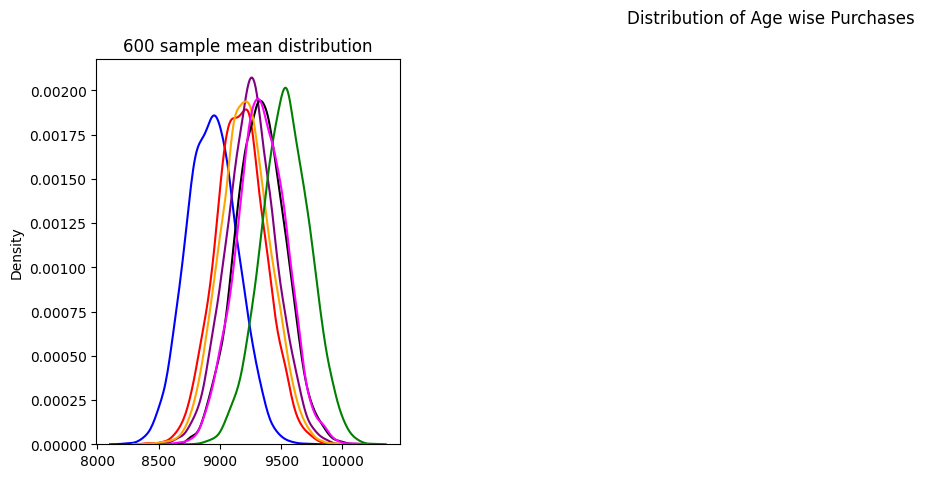

In [64]:
plt.figure(figsize=(18,5))
plt.suptitle("Distribution of Age wise Purchases")
plt.subplot(141)
sns.kdeplot(child_samp_600,color='blue')
sns.kdeplot(youth_samp_600,color='red')
sns.kdeplot(youngadult_samp_600,color='purple')
sns.kdeplot(middleadult_samp_600,color='black')
sns.kdeplot(matureadult_samp_600,color='orange')
sns.kdeplot(oldadult_samp_600,color='green')
sns.kdeplot(old_samp_600,color='magenta')
plt.title("600 sample mean distribution")

In [65]:
# @title *3000 samples mean range with 95% confidence interval*

child_samp_1200=[child_samp.sample(1200).mean() for i in range(5000)]
youth_samp_1200=[youth_samp.sample(1200).mean() for i in range(5000)]
youngadult_samp_1200=[youngadult_samp.sample(1200).mean() for i in range(5000)]
middleadult_samp_1200=[middleadult_samp.sample(1200).mean() for i in range(5000)]
matureadult_samp_1200=[matureadult_samp.sample(1200).mean() for i in range(5000)]
oldadult_samp_1200=[oldadult_samp.sample(1200).mean() for i in range(5000)]
old_samp_1200=[old_samp.sample(1200).mean() for i in range(5000)]

print(f"For 3000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(child_samp_1200,95)}")
print(f"For 3000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youth_samp_1200,95)}")
print(f"For 3000 26-35 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youngadult_samp_1200,95)}")
print(f"For 3000 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(middleadult_samp_1200,95)}")
print(f"For 3000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(matureadult_samp_1200,95)}")
print(f"For 3000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(oldadult_samp_1200,95)}")
print(f"For 3000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(old_samp_1200,95)}")

For 3000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8664.15, 9206.3)
For 3000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8886.97, 9448.98)
For 3000 26-35 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8965.51, 9539.66)
For 3000 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9042.37, 9615.14)
For 3000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8931.26, 9491.03)
For 3000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9248.87, 9825.65)
For 3000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9063.15, 9606.14)


Text(0.5, 0, 'Blue represents Age 0-17\nRed represents Age 18-25\nPurple represents Age 26-35\nBlack represents Age 36-45\nOrange represents Age 46-50\nGreen represents Age 51-55\nMagenta represents Age 55+')

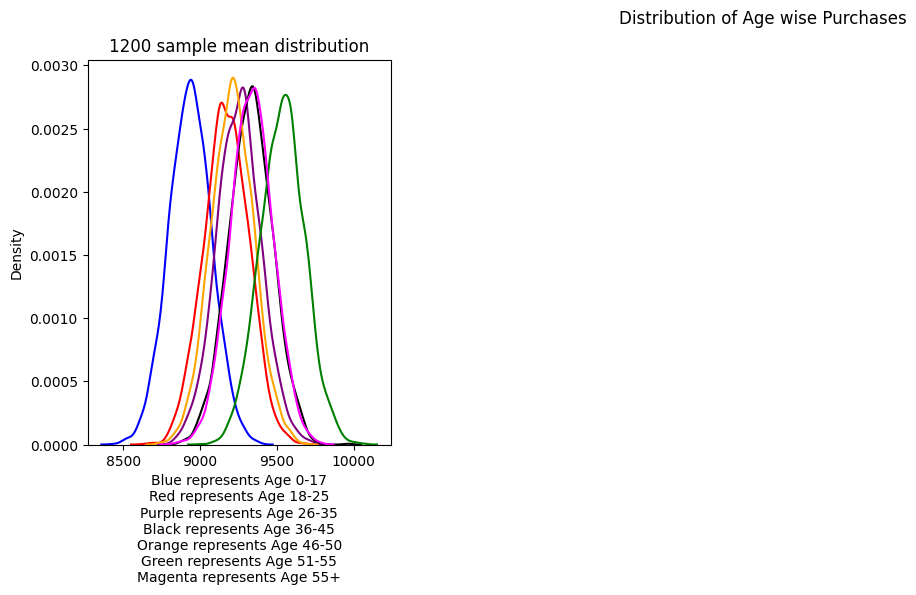

In [66]:
plt.figure(figsize=(18,5))
plt.suptitle("Distribution of Age wise Purchases")
plt.subplot(141)
sns.kdeplot(child_samp_1200,color='blue')
sns.kdeplot(youth_samp_1200,color='red')
sns.kdeplot(youngadult_samp_1200,color='purple')
sns.kdeplot(middleadult_samp_1200,color='black')
sns.kdeplot(matureadult_samp_1200,color='orange')
sns.kdeplot(oldadult_samp_1200,color='green')
sns.kdeplot(old_samp_1200,color='magenta')
plt.title("1200 sample mean distribution")


plt.xlabel("Blue represents Age 0-17\nRed represents Age 18-25\nPurple represents Age 26-35\nBlack represents Age 36-45\nOrange represents Age 46-50\nGreen represents Age 51-55\nMagenta represents Age 55+")

- When using the entire dataset,we were not able to conclude the difference in spending behaviour because of the outliers which pulls the mean value of all age groups to be in the same levels causing overlap.
- Hence performed CI with sample size of 300 for 5000 iterations at 95% confidence interval,the results were same, there was overlap in all age groups thus not able to conclude.
- Increased sample size to 600 for 5000 iterations at 95% CI there was still overlap at 95% confidence Intervalbut it starting decreasing for some age groups, but we are still unable to conclude anything.
- Increased sample size to 1200 for 5000 iterations at 95% CI, resulting in not all age groups have overlap and decreasing the overlap.
- Increased sample size to 1200 for 5000 iterations at 90% CI, resulting in not all age groups have overlap and decreasing the overlap but now we can coclude about some groups behaving differently and some behaving similarly.
- We can say that with 90% CI that the age group 0-17 has less amount mean purchase value, followed by 18-25,26-35,55+/36-45and maximum for 51-55 age group.
- We can say that with 90% CI that the age group 36-45 and 55+ have similar buying habits in term of purchases.
- There is not much variation in the confidence interval range of all age groups which shows similarity of dispersion in all groups.
With the increase in sample size , the shape of distribution bexomes less wider and more peaky and tended towards normality.
- The overlap between many groups decreased with sample size increase while for some it remained the same, showing th esimilarity and sifferences in their purchasing patterns .

# *Report*

- On 95% Confidence Interval, we can conclude that males average purchases are more than the females. So, males can easily be targetted with the help of offers and deals. Females must be given other offers so that they also involve in the purchase.
- For Marital status, there is no significant statistical difference in average purchases of married and unmarried. So, there is not any need to differentiate customers based on their marital status for marketing and targeting sales.
- For Age group, there is little significant difference for some age groups in average purchases at 90% Confidence interval. Age group(50-55) spends the most followed by 55+/(36-45),26-55, 18-25 and age group (0-17) the least. The average purchases by 36-45 and 55+ have similar spending habits with some overlap between many groups. So we can include kids product more to increase their purchases but kids spending limits are limited so to be focus more on 18-25 age group products and improving more for 51-55 products as these customers goes for high amount products.
- Almost 1/4th customers exhibit a preference for purchasing items within product category 5. On the other hand, product category 9 experiences the least popularity, with only a minimal 0.07% of customers expressing a preference for it.
-The majority of customers fall under Occupation category 4.
- Walmart customers are distributed across different city categories: 42.03% belong to category B, 31.12% belong to category C, and the remaining 27% belong to category A.
- The majority of customers are those who are their in a city for a duration of one year.
- Customers residing in a 'C' city category demonstrate higher spending per transaction compared to customers in other city categories.
- Female customers predominantly favor product category 5 for their purchases, while male customers show a preference for product category 1 in their shopping choices.

# *RECOMMENDATIONS*

- Need to work on product Categories 3,4,12,13,15,16, 19 and 20 to see why people are not repeating sale  for these categories much as number of sales are less as compared to new customers for these product categories.

- product category 19 and 20 are attracting have less amount purchase too need to review them more and take necessary actions.
- To make sure the store provides a wide variety of products that align with the preferences and requirements of female customers. This might encompass a diverse range, spanning from clothing and beauty products and much more.
- Take feedback from female customers to understand their preferences, requirements and suggestions to make available the products required by them.
- Can give special discount to female customers, featuring exclusive perks like discounts ,early access to sales, and beauty shows etc. This may enhance engagement and attract female shoppers.
- As female spending limit is less than males products should be made available as per their average purchases.
- Though males accounts for 75% sales, they should be taken care of to get them engaged with more shopping attractions.
- Collaborate with brands or influencers that relate with female customers. This can help expand reach and attract new female customers too.
- Hence walmart must focus on women products to improve the avg spending either through offers,discounts or marketing.

- Recognizing that customers in the 51 - 55 age group have the highest spending per transaction,so this age group should be advertised with wide variety of products so that they get attracted to those products.

- Different sections should be created according to different age groups as theri spending behaviour differs to enhance shopping experience.


In [ ]:
!pip install nbconvert


In [ ]:
%%shell
jupyter nbconvert --to html /content/walmart_case_Study.ipynb

[NbConvertApp] Converting notebook /content/walmart_case_Study.ipynb to html
[NbConvertApp] Writing 2879981 bytes to /content/walmart_case_Study.html
